In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

In [2]:
# Load dataset
heart_data = pd.read_csv('heart.csv')

In [4]:
# Data overview
print("Dataset Overview:")
print(heart_data.head(), "\n\n")
print("Shape:", heart_data.shape)
print("Target Value Counts:")
print(heart_data['target'].value_counts(), "\n\n")

Dataset Overview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   


Shape: (303, 14)
Target Value Counts:
target
1    165
0    138
Name: count, dtype: int64 




In [6]:
# Features and target
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [7]:
# Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

In [9]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [32]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Evaluate on training data
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, train_preds)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.86


In [11]:
# Evaluate on test data
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_preds)
print(f"Test Accuracy: {test_accuracy:.2f}\n")

Test Accuracy: 0.80



In [20]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


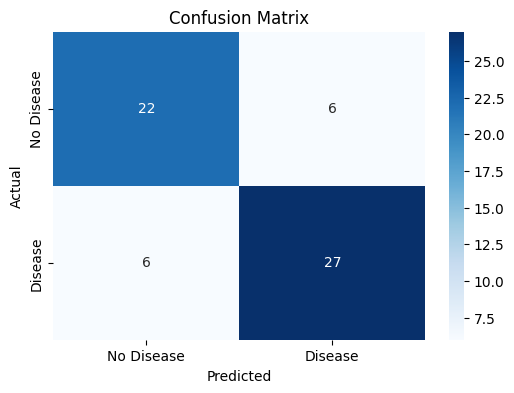

In [22]:
# Confusion matrix
cm = confusion_matrix(Y_test, test_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [24]:
# Classification report
print("Classification Report:\n")
print(classification_report(Y_test, test_preds))

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [25]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [26]:
# ROC curve and AUC
y_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)

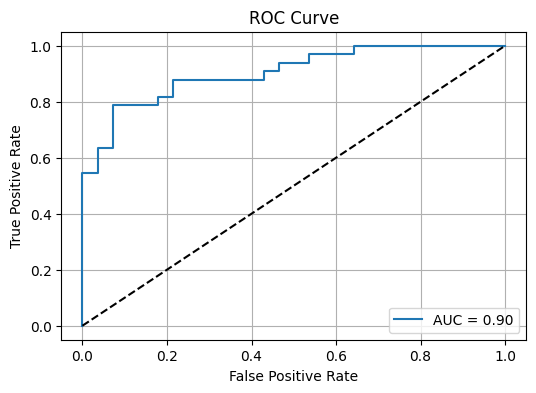

In [27]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.2f}".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [28]:
# Predict on a new sample
input_data = (56, 1, 1, 120, 236, 0, 1, 178, 0, 0.8, 2, 0, 2)
input_df = pd.DataFrame([input_data], columns=X.columns)

In [29]:
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)[0][1]

In [30]:
print("Prediction:", "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease")
print(f"Prediction Probability (Confidence): {prediction_proba:.2%}")

Prediction: Has Heart Disease
Prediction Probability (Confidence): 90.24%
